<a href="https://colab.research.google.com/github/ttma333/python/blob/main/RNN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#훈련세트와 테스트 세트의 개수 출력
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
# 두 문장의 단어의 수 각각 출력
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
print(train_input[0])

word_to_index = imdb.get_word_index()
index_to_word={}

#0, 1, 2, 3은 특별 토큰이기 때문에 3을 더해서 배열에 저장
for key, value in word_to_index.items():
    index_to_word[value+3] = key

# 0 : 패딩 토큰
# 1 : 문장 시작 토큰
# 2 : 미확인 토큰
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in train_input[0]]))

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1646592/1641221 [==============================] - 0s 0us/step
<sos> this film was just <unk> <unk> <unk> <unk> story direction <unk> really <unk> the 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


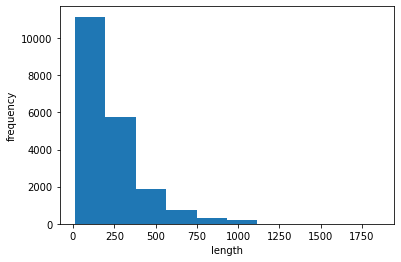

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 단어의 수를 100으로 설정
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape)

(20000, 100)


In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

print(train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.7002 - accuracy: 0.5027 - val_loss: 0.6952 - val_accuracy: 0.4998
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6951 - accuracy: 0.5070 - val_loss: 0.6934 - val_accuracy: 0.5058
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6924 - val_accuracy: 0.5088
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6912 - accuracy: 0.5246 - val_loss: 0.6915 - val_accuracy: 0.5132
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6883 - accuracy: 0.5364 - val_loss: 0.6872 - val_accuracy: 0.5402
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6792 - accuracy: 0.5816 - val_loss: 0.6778 - val_accuracy: 0.5860
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6670 - accuracy: 0.6256 - val_loss: 0.6637 - val_ac

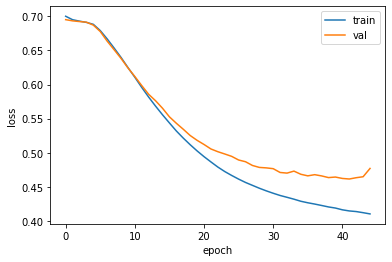

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6956 - accuracy: 0.5059 - val_loss: 0.6903 - val_accuracy: 0.5270
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6851 - accuracy: 0.5591 - val_loss: 0.6760 - val_accuracy: 0.5946
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6245 - accuracy: 0.6838 - val_loss: 0.6016 - val_accuracy: 0.7102
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5761 - accuracy: 0.7319 - val_loss: 0.5640 - val_accuracy: 0.7452
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5471 - accuracy: 0.7555 - val_loss: 0.5427 - val_accuracy: 0.7624
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5254 - accuracy: 0.7702 - val_loss: 0.5242 - val_accuracy: 0.7658
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5081 - accuracy: 0.7788 - val_loss: 0.5126 - val_accuracy:

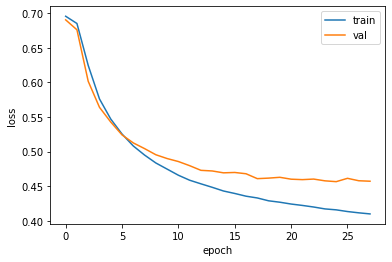

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()